 link of the dataset : https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in inception.layers:
    layer.trainable = False

In [13]:
folders = glob('dataset/*')

In [14]:
x = Flatten()(inception.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
 	zoom_range=0.15,
 	height_shift_range=0.2,
 	shear_range=0.15,
 	horizontal_flip=True,
    validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255) 

In [19]:
train_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')


validation_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') 

Found 1773 images belonging to 4 classes.
Found 196 images belonging to 4 classes.


In [22]:
r = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10,)

Epoch 1/10
56/56 [==============================] - 17s 303ms/step - loss: 0.7193 - accuracy: 0.9385 - val_loss: 1.1440 - val_accuracy: 0.9133
Epoch 2/10
56/56 [==============================] - 17s 296ms/step - loss: 0.5206 - accuracy: 0.9425 - val_loss: 2.9698 - val_accuracy: 0.8367
Epoch 3/10
56/56 [==============================] - 17s 295ms/step - loss: 0.8498 - accuracy: 0.9284 - val_loss: 1.3988 - val_accuracy: 0.8929
Epoch 4/10
56/56 [==============================] - 16s 293ms/step - loss: 0.7388 - accuracy: 0.9351 - val_loss: 2.2978 - val_accuracy: 0.8724
Epoch 5/10
56/56 [==============================] - 17s 296ms/step - loss: 0.6503 - accuracy: 0.9419 - val_loss: 1.8851 - val_accuracy: 0.8776
Epoch 6/10
56/56 [==============================] - 17s 299ms/step - loss: 0.9291 - accuracy: 0.9391 - val_loss: 1.1741 - val_accuracy: 0.9286
Epoch 7/10
56/56 [==============================] - 17s 299ms/step - loss: 0.9348 - accuracy: 0.9255 - val_loss: 1.6612 - val_accuracy: 0.8673

In [23]:
import matplotlib.pyplot as plt

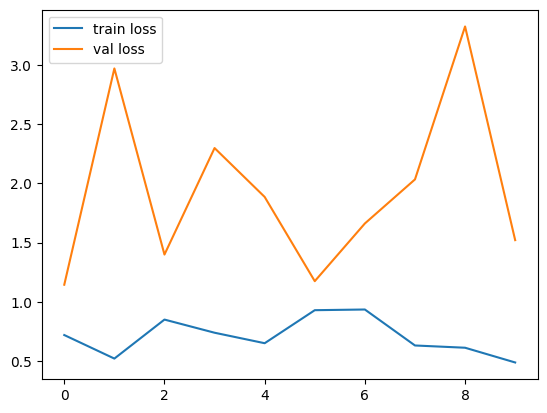

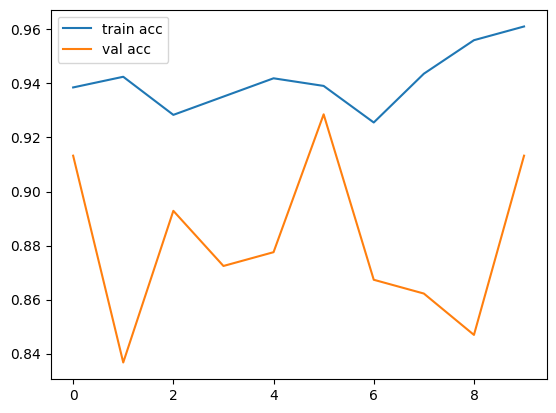

In [24]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [28]:
y_pred = model.predict(validation_generator)

In [29]:
y_pred

array([[7.65866381e-33, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.07876344e-28, 1.00000000e+00, 3.94533744e-25, 4.66916523e-17],
       [3.27703742e-06, 4.63360950e-04, 1.48823693e-01, 8.50709736e-01],
       [1.53587119e-34, 9.99999762e-01, 3.18576785e-33, 2.02997427e-07],
       [2.03605654e-28, 1.00000000e+00, 3.17209660e-29, 1.81493756e-36],
       [7.17592106e-20, 1.00000000e+00, 6.91107395e-14, 6.05203428e-18],
       [3.20204967e-31, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.03225654e-20, 0.00000000e+00, 3.68297515e-33],
       [4.09879305e-33, 4.37694898e-24, 0.00000000e+00, 1.00000000e+00],
       [2.51879757e-24, 9.25018134e-31, 1.00000000e+00, 1.17893925e-31],
       [3.79632211e-25, 1.00000000e+00, 9.48805720e-31, 7.29485786e-33],
       [7.83728600e-01, 4.63205910e-25, 2.16271356e-01, 1.38514662e-33],
       [1.02028824e-12, 6.75095293e-07, 1.68613356e

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([1, 1, 3, 1, 1, 1, 2, 0, 0, 3, 2, 1, 0, 3, 3, 1, 2, 2, 1, 0, 3, 1,
       1, 1, 1, 1, 2, 3, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 3,
       1, 1, 2, 3, 3, 0, 1, 1, 1, 2, 3, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 3, 0, 1, 1, 3, 2, 3, 0, 2, 1,
       3, 0, 0, 1, 0, 3, 1, 1, 3, 3, 2, 1, 0, 1, 0, 0, 1, 3, 1, 2, 1, 1,
       1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 3, 0, 2, 3, 2, 1, 2, 1, 1, 1, 0, 0,
       3, 1, 3, 1, 2, 1, 1, 1, 1, 0, 1, 3, 3, 1, 1, 1, 2, 0, 3, 0, 3, 1,
       1, 2, 0, 1, 1, 0, 2, 3, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 1, 3, 2, 0, 2, 3, 2, 0, 1, 1, 2, 0, 2, 3, 0, 2, 2, 1],
      dtype=int64)